In [159]:
import pandas as pd
import numpy as np

# 假设 df 是您的数据
# 填充 NaN 值，可以选择填充为 0 或其他值
df = pd.read_csv('ProcessedData/data4Supervised.csv')
df = df.fillna(0)

In [160]:
X = df[
    ['Gold', 'Silver', 'Bronze', 'Past_Gold', 'Past_Silver', 'Past_Bronze', 'Events_Count', 'Sports_Count', 'isHoster']]
y = df['Total']

In [161]:
print(df.head(1))

   Unnamed: 0  NOC  Gold  Silver  Bronze  Total  Year  Past_Gold  Past_Silver  \
0           0  USA    11       7       2     20  1896        0.0          0.0   

   Past_Bronze  Past_Total  Events_Count  Sports_Count  isHoster  
0          0.0         0.0          27.0          27.0       0.0  


In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

线性回归（Linear Regression）

In [163]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 训练模型
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 预测并评估
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression MSE: {mse}')
print(f'Linear Regression R²: {r2}')


Linear Regression MSE: 2.0586812193531536e-26
Linear Regression R²: 1.0


决策树回归（Decision Tree Regressor）

In [164]:
from sklearn.tree import DecisionTreeRegressor

# 训练模型
dt_model = DecisionTreeRegressor(max_depth=None, min_samples_split=5, max_features=None, max_leaf_nodes=None,
                                 random_state=42)
dt_model.fit(X_train, y_train)

# 预测并评估
y_pred = dt_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Decision Tree MSE: {mse}')
print(f'Decision Tree R²: {r2}')


Decision Tree MSE: 15.630487567987574
Decision Tree R²: 0.9685742351547798


In [165]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'max_leaf_nodes': [None]}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Best max_leaf_nodes: {grid_search.best_params_}")

Best max_leaf_nodes: {'max_leaf_nodes': None}


随机森林回归（Random Forest Regressor）

In [166]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# 定义参数范围
param_grid = {'max_features': [6]}

# 创建模型
rf = RandomForestRegressor(random_state=42, n_estimators=287, max_depth=19, min_samples_split=2, min_samples_leaf=2)

# 使用 GridSearchCV 调整 max_features
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 输出最佳参数
print(f"Best max_features: {grid_search.best_params_}")
print(f"Best MSE: {-grid_search.best_score_}")



Best max_features: {'max_features': 6}
Best MSE: 8.57877439013561


梯度提升回归（Gradient Boosting Regressor）

In [167]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2],
    'min_samples_split': [12],
    'n_estimators': [1549],
    'learning_rate': [0.072],
    'min_samples_leaf': [2]
}

gbr = GradientBoostingRegressor(
    random_state=42
)

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 输出最佳参数
print(f"Best parameters for max_depth and min_samples_split: {grid_search.best_params_}")
print(f"Best MSE: {-grid_search.best_score_}")


Best parameters for max_depth and min_samples_split: {'learning_rate': 0.072, 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 12, 'n_estimators': 1549}
Best MSE: 5.109942680162538


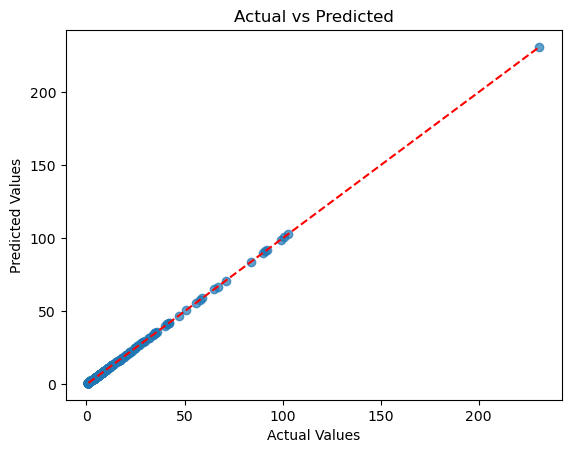

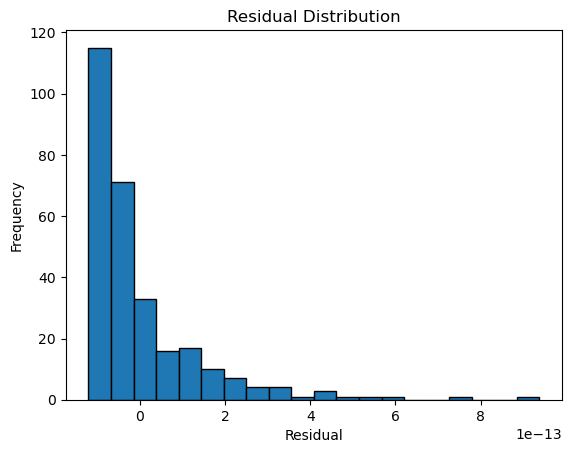

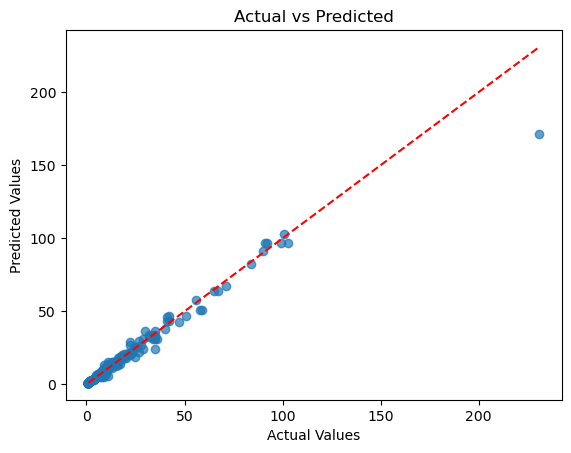

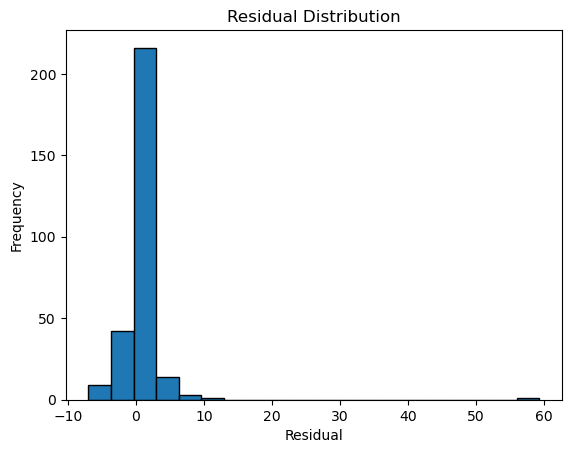

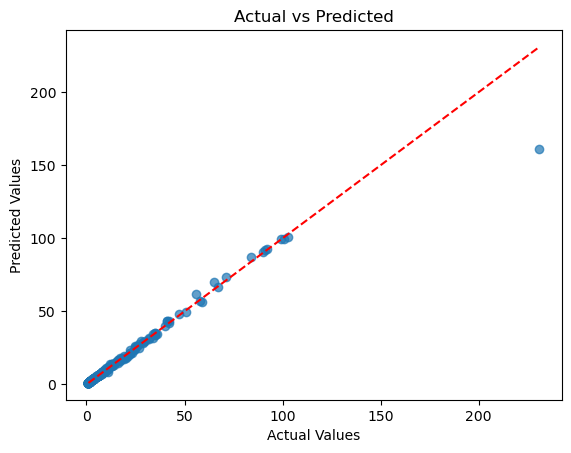

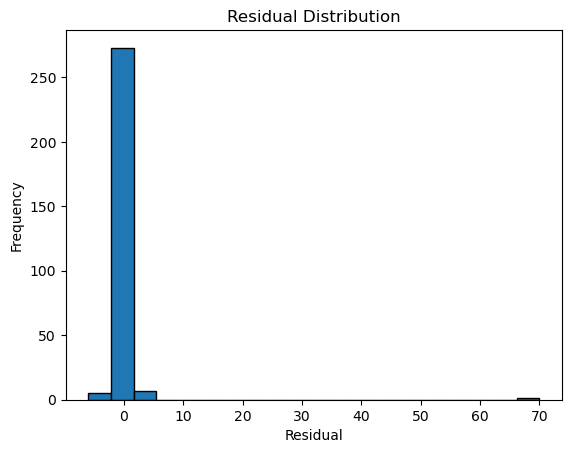

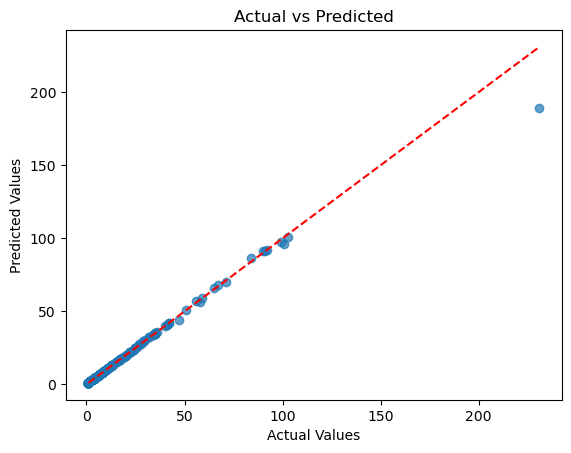

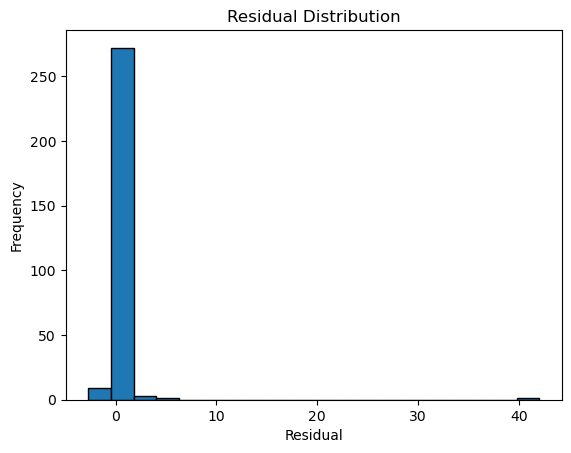

               Model           MSE        R²   MAPE
0  Linear Regression  2.058681e-26  1.000000  0.00%
1      Decision Tree  1.563049e+01  0.968574  4.68%
2      Random Forest  1.774486e+01  0.964323  3.27%
3  Gradient Boosting  6.381681e+00  0.987169  0.78%


In [168]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

# 假设 df 是您的数据
X = df[
    ['Gold', 'Silver', 'Bronze', 'Past_Gold', 'Past_Silver', 'Past_Bronze', 'Events_Count', 'Sports_Count', 'isHoster']]
y = df['Total']

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化模型
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=None, min_samples_split=5, max_features=None, max_leaf_nodes=None,
                                           random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=287, max_depth=19, random_state=42, min_samples_split=2,
                                           min_samples_leaf=2, max_features=6),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42,
                                                   max_depth=2,
                                                   min_samples_split=12,
                                                   n_estimators=1549,
                                                   learning_rate=0.072,
                                                   min_samples_leaf=2
                                                   )
}

# 用于记录每个模型的评估指标
model_metrics = []

# 训练并评估每个模型
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # 计算 MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)
    # print(f"MAPE: {mape:.2%}")

    # 将每个模型的评估结果记录到 model_metrics 中
    model_metrics.append({
        "Model": model_name,
        "MSE": mse,
        "R²": r2,
        "MAPE": f"{mape:.2%}"  # 将 mape 转换为百分比并保留两位小数
    })

    # 可视化，如果点大致沿对角线分布，说明模型的预测能力较强。
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted')
    plt.show()

    # 残差分析
    # 如果残差呈正态分布且均值接近零，说明模型预测较为稳定。
    # 如果有明显偏差或趋势，说明模型可能有系统性问题。
    residuals = y_test - y_pred
    plt.hist(residuals, bins=20, edgecolor='k')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.title('Residual Distribution')
    plt.show()

# 将结果转换为 DataFrame
metrics_df = pd.DataFrame(model_metrics)
# 查看结果
print(metrics_df)


In [169]:
# 创建特征
df['Gold_Ratio'] = df['Past_Gold'] / (df['Past_Total'] + 1e-6)  # 防止除零
df['Silver_Ratio'] = df['Past_Silver'] / (df['Past_Total'] + 1e-6)
df['Bronze_Ratio'] = df['Past_Bronze'] / (df['Past_Total'] + 1e-6)

# 最终特征集
X = df[[
    'Gold', 'Silver', 'Bronze',        # 当前表现
    'Past_Gold', 'Past_Silver', 'Past_Bronze', 'Past_Total',  # 历史表现
    'Gold_Ratio', 'Silver_Ratio', 'Bronze_Ratio',  # 奖牌比例
    'Events_Count', 'Sports_Count',   # 参赛规模
    'isHoster',                       # 主办国效应
    'Year'                            # 时间趋势
]]

# 目标变量（根据需求切换）
y_total = df['Total']     # 奖牌总数
y_gold = df['Gold']       # 金牌
y_silver = df['Silver']   # 银牌
y_bronze = df['Bronze']   # 铜牌


In [170]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# 数据分割
X_train, X_test, y_train_total, y_test_total = train_test_split(X, y_total, test_size=0.2, random_state=42)

# 模型初始化
gbr_total = GradientBoostingRegressor(
    random_state=42,
    max_depth=2,
    min_samples_split=12,
    n_estimators=1549,
    learning_rate=0.072,
    min_samples_leaf=2
)

# 训练模型（预测总奖牌）
gbr_total.fit(X_train, y_train_total)

# 测试模型
y_pred_total = gbr_total.predict(X_test)
print("Total Medal Prediction Complete.")


Total Medal Prediction Complete.


In [171]:
from sklearn.multioutput import MultiOutputRegressor

# 定义多目标变量
y_multi = df[['Gold', 'Silver', 'Bronze', 'Total']]

# 数据分割
X_train, X_test, y_train_multi, y_test_multi = train_test_split(X, y_multi, test_size=0.2, random_state=42)

# 初始化多目标模型
multi_target_model = MultiOutputRegressor(GradientBoostingRegressor(
    random_state=42,
    max_depth=2,
    min_samples_split=12,
    n_estimators=1549,
    learning_rate=0.072,
    min_samples_leaf=2
))

# 训练多目标模型
multi_target_model.fit(X_train, y_train_multi)

# 测试多目标模型
y_pred_multi = multi_target_model.predict(X_test)
print("Multi-output Prediction Complete.")


Multi-output Prediction Complete.


In [172]:
from sklearn.metrics import mean_squared_error, r2_score

# 评估单目标模型
mse_total = mean_squared_error(y_test_total, y_pred_total)
r2_total = r2_score(y_test_total, y_pred_total)
print(f"Total Medals - MSE: {mse_total}, R2: {r2_total}")

# 评估多目标模型
for i, medal_type in enumerate(['Gold', 'Silver', 'Bronze', 'Total']):
    mse = mean_squared_error(y_test_multi.iloc[:, i], y_pred_multi[:, i])
    r2 = r2_score(y_test_multi.iloc[:, i], y_pred_multi[:, i])
    print(f"{medal_type} - MSE: {mse}, R2: {r2}")


Total Medals - MSE: 6.0702319128187625, R2: 0.9877955386984288
Gold - MSE: 0.06852794748154593, R2: 0.9990520557336189
Silver - MSE: 0.5848293436654953, R2: 0.9891715160912854
Bronze - MSE: 3.3765932846670412, R2: 0.9330575999657218
Total - MSE: 6.0702319128187625, R2: 0.9877955386984288


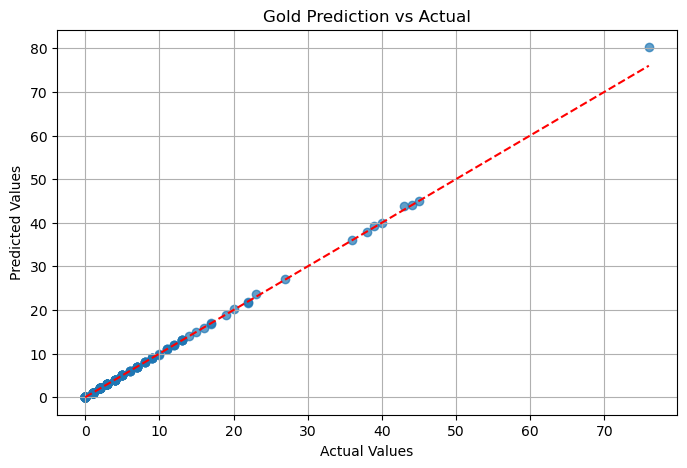

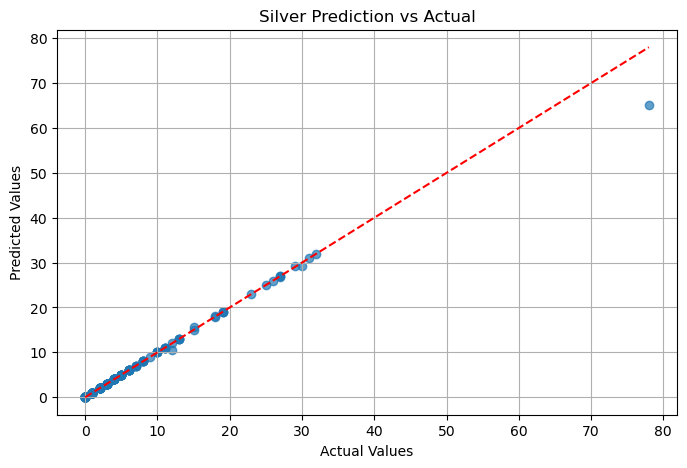

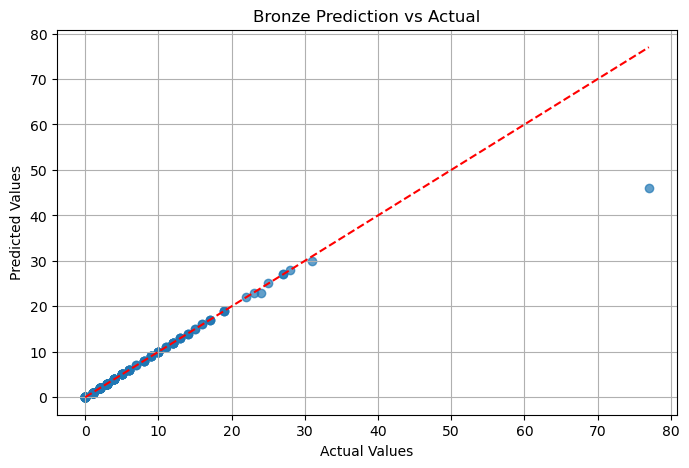

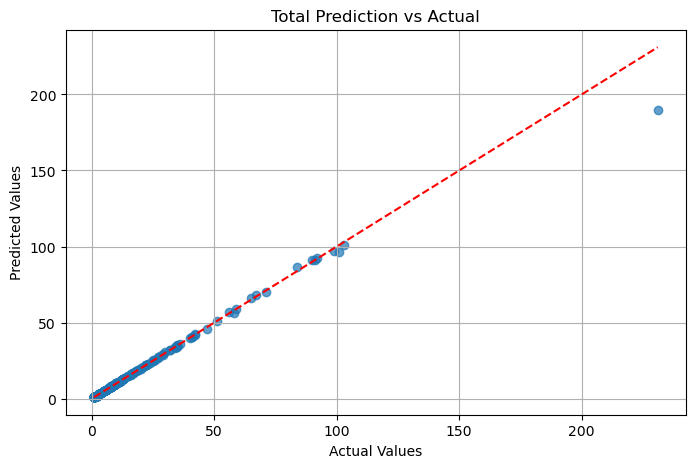

In [173]:
import matplotlib.pyplot as plt

for i, target in enumerate(['Gold', 'Silver', 'Bronze', 'Total']):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test_multi.iloc[:, i], y_pred_multi[:, i], alpha=0.7)
    plt.plot([y_test_multi.iloc[:, i].min(), y_test_multi.iloc[:, i].max()],
             [y_test_multi.iloc[:, i].min(), y_test_multi.iloc[:, i].max()],
             color='red', linestyle='--')
    plt.title(f"{target} Prediction vs Actual")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid()
    plt.show()


In [174]:
# 提取 2024 年的数据
df_2024 = df[df['Year'] == 2024][['NOC', 'Gold', 'Silver', 'Bronze', 'Total']]
df_2024.rename(columns={
    'Gold': 'Past_Gold',
    'Silver': 'Past_Silver',
    'Bronze': 'Past_Bronze',
    'Total': 'Past_Total'
}, inplace=True)

# 创建 2028 年的数据
countries_2028 = df['NOC'].unique()
df_2028 = pd.DataFrame(countries_2028, columns=['NOC'])
df_2028['Year'] = 2028
df_2028['isHoster'] = (df_2028['NOC'] == 'USA').astype(int)

# 合并历史数据
df_2028 = df_2028.merge(df_2024, on='NOC', how='left')
df_2028.fillna(0, inplace=True)

# 添加其他特征
df_2028['Events_Count'] = df[df['Year'] == 2024].groupby('NOC')['Events_Count'].mean().reindex(df_2028['NOC']).values
df_2028['Sports_Count'] = df[df['Year'] == 2024].groupby('NOC')['Sports_Count'].mean().reindex(df_2028['NOC']).values
df_2028.fillna(0, inplace=True)

df_2028['Gold_Ratio'] = df_2028['Past_Gold'] / df_2028['Past_Total']
df_2028['Silver_Ratio'] = df_2028['Past_Silver'] / df_2028['Past_Total']
df_2028['Bronze_Ratio'] = df_2028['Past_Bronze'] / df_2028['Past_Total']

# 将 NaN 替换为 0（如 Total 为 0 的情况）
df_2028.fillna(0, inplace=True)

df_2028['Gold'] = df_2028['Past_Gold']
df_2028['Silver'] = df_2028['Past_Silver']
df_2028['Bronze'] = df_2028['Past_Bronze']

# 准备预测特征
X_2028 = df_2028[X.columns]  # 使用训练时的特征顺序



In [175]:
# 预测 2028 年的金、银、铜牌以及总奖牌数
y_pred_2028 = multi_target_model.predict(X_2028)

# 将预测结果加入数据框
df_2028['Predicted_Gold'] = y_pred_2028[:, 0]
df_2028['Predicted_Silver'] = y_pred_2028[:, 1]
df_2028['Predicted_Bronze'] = y_pred_2028[:, 2]
df_2028['Predicted_Total'] = y_pred_2028[:, 3]

# 查看预测结果
print(df_2028[['NOC', 'Predicted_Gold', 'Predicted_Silver', 'Predicted_Bronze', 'Predicted_Total']])


     NOC  Predicted_Gold  Predicted_Silver  Predicted_Bronze  Predicted_Total
0    USA       39.988485         44.499701      4.203641e+01       124.827956
1    GRE        1.000030          0.999900      5.999979e+00         8.059666
2    GER       12.009016         12.999887      8.000504e+00        33.103506
3    FRA       16.138901         26.002270      2.199671e+01        63.712330
4    GBR       14.065815         21.987511      2.900299e+01        64.556143
..   ...             ...               ...               ...              ...
147  LCA        0.999943          0.999984     -6.085662e-06         1.980861
148  DMA        0.999973          0.000024     -4.049920e-07         1.001707
149  ALB        0.000027          0.000007      1.999997e+00         1.980086
150  CPV        0.000027          0.000007      1.000001e+00         1.005000
151  EOR        0.000027          0.000007      1.000003e+00         1.005000

[152 rows x 5 columns]


In [176]:
# 删除冲突列
if 'Past_Total' in df_2028.columns:
    df_2028.drop(columns=['Past_Total'], inplace=True)

# 合并数据
df_compare = df_2028.merge(df_2024[['NOC', 'Past_Total']], on='NOC', how='left')

# 检查合并后是否生成了 Past_Total_x 和 Past_Total_y
if 'Past_Total_x' in df_compare.columns and 'Past_Total_y' in df_compare.columns:
    # 使用 Past_Total_y 计算 Improvement
    df_compare['Improvement'] = df_compare['Predicted_Total'] - df_compare['Past_Total_y']
    # 删除多余列
    df_compare.drop(columns=['Past_Total_x'], inplace=True)
else:
    # 使用正确的列计算 Improvement
    df_compare['Improvement'] = df_compare['Predicted_Total'] - df_compare['Past_Total']

# 排序进步和退步的国家
df_compare.sort_values(by='Improvement', ascending=False, inplace=True)

# 显示结果
print("Most Improved Countries in 2028:")
print(df_compare[['NOC', 'Improvement']].head(10))

print("\nCountries Likely to Do Worse in 2028:")
print(df_compare[['NOC', 'Improvement']].tail(10))


Most Improved Countries in 2028:
    NOC  Improvement
81  CHN     2.057899
7   AUS     1.248101
11  ITA     0.309131
14  ESP     0.273211
2   GER     0.103506
10  BEL     0.103073
60  TPE     0.084714
29  NZL     0.080341
43  TUR     0.079926
13  CAN     0.070969

Countries Likely to Do Worse in 2028:
     NOC  Improvement
129  SAM          NaN
130  SUD          NaN
131  AFG          NaN
132  MRI          NaN
133  TOG          NaN
138  GAB          NaN
140  MNE          NaN
144  SMR          NaN
145  TKM          NaN
146  BUR          NaN


In [177]:
# 简单预测区间估计（基于残差的标准差）
import numpy as np

# 假设残差标准差
std_dev = np.std(y_test_multi - multi_target_model.predict(X_test), axis=0)

# 计算区间
df_2028['Gold_Lower'] = df_2028['Predicted_Gold'] - 1.96 * std_dev[0]
df_2028['Gold_Upper'] = df_2028['Predicted_Gold'] + 1.96 * std_dev[0]

# 可以类似计算 Silver, Bronze, Total 的预测区间


C:\Users\ZS\AppData\Local\Temp\ipykernel_4752\826026045.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_2028['Gold_Lower'] = df_2028['Predicted_Gold'] - 1.96 * std_dev[0]
C:\Users\ZS\AppData\Local\Temp\ipykernel_4752\826026045.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_2028['Gold_Upper'] = df_2028['Predicted_Gold'] + 1.96 * std_dev[0]


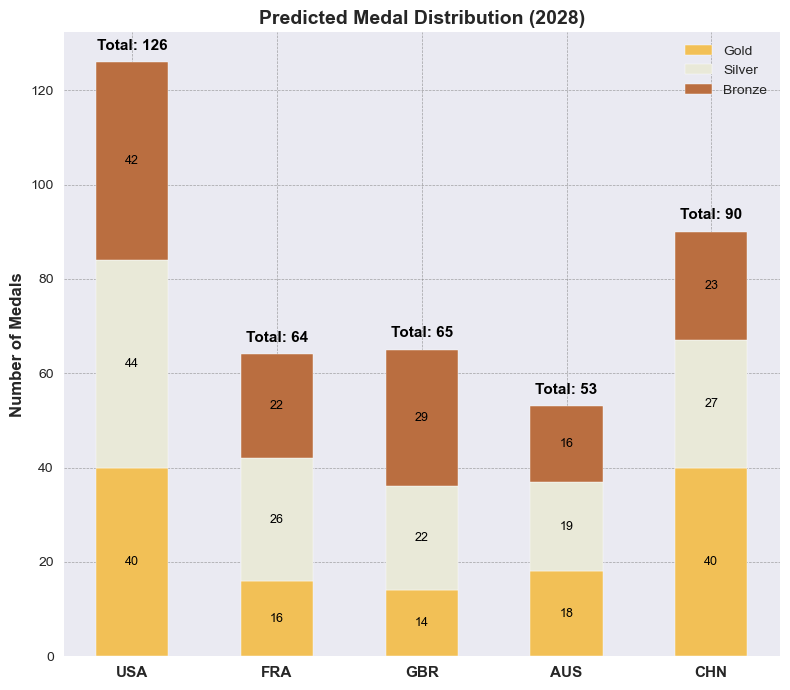

In [205]:
import matplotlib.pyplot as plt
import numpy as np

# 假设你的数据存储在 df_2028 中，包含 Predicted_Gold, Predicted_Silver, Predicted_Bronze 列
countries = ['USA', 'FRA', 'GBR', 'AUS', 'CHN']  # 示例国家
data = df_2028[df_2028['NOC'].isin(countries)]

# 提取数据并保留整数（四舍五入）
x = np.arange(len(countries))
gold = np.round(data['Predicted_Gold'].values)
silver = np.round(data['Predicted_Silver'].values)
bronze = np.round(data['Predicted_Bronze'].values)
total = gold + silver + bronze

# 设置风格
plt.style.use('seaborn-v0_8-darkgrid')  # 使用 Matplotlib 提供的兼容样式


# 创建堆叠柱状图
plt.figure(figsize=(8, 7))
bars1 = plt.bar(x, gold, label='Gold', color='#F2C056', edgecolor='white', width=0.5)
bars2 = plt.bar(x, silver, bottom=gold, label='Silver', color='#E9E9D8', edgecolor='white', width=0.5)
bars3 = plt.bar(x, bronze, bottom=gold + silver, label='Bronze', color='#BA6E40', edgecolor='white', width=0.5)

# 添加每部分的数值标签
for i in range(len(x)):
    plt.text(x[i], gold[i] / 2, f'{gold[i]:.0f}', ha='center', va='center', fontsize=9, color='black')  # Gold 标签
    plt.text(x[i], gold[i] + silver[i] / 2, f'{silver[i]:.0f}', ha='center', va='center', fontsize=9, color='black')  # Silver 标签
    plt.text(x[i], gold[i] + silver[i] + bronze[i] / 2, f'{bronze[i]:.0f}', ha='center', va='center', fontsize=9, color='black')  # Bronze 标签

# 添加总数值标签
for i in range(len(x)):
    plt.text(x[i], total[i] + 2, f'Total: {total[i]:.0f}', ha='center', va='bottom', fontsize=11, color='black', fontweight='bold')

# 添加标签和标题
plt.xticks(x, countries, fontsize=11, fontweight='bold')
plt.yticks(fontsize=10)
plt.ylabel('Number of Medals', fontsize=12, fontweight='bold')
plt.title('Predicted Medal Distribution (2028)', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='upper right')

# 调整网格样式
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

# 显示图表
plt.show()
